# Reconocimiento Óptico de Caracteres Escritos a Mano

## Librerias Utilizadas

In [0]:
import cv2 as cv
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from sklearn.svm import SVC
from tensorflow import keras
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student-proyecto/final_project
!pwd

Mounted at /content/drive
/content/drive/My Drive/cv-uis-student-proyecto/final_project
/content/drive/My Drive/cv-uis-student-proyecto/final_project


## Lectura del Dataset de Entrenamiento NIST

In [0]:
data_nist = loadmat('nist.mat')
xn = data_nist['x']
yn = data_nist['y']

### Creación de un diccionario de clases para las etiquetas del dataset

In [0]:
dic = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18, 'J':19, 'K':20, 'L':21, 'M':22, 'N':23,
       'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35, 'a':36, 'b':37, 'c':38, 'd':39, 'e':40, 'f':41, 'g':42, 'h':43, 'i':44, 'j':45, 'k':46,
       'l':47, 'm':48, 'n':49, 'o':50, 'p':51, 'q':52, 'r':53, 's':54, 't':55, 'u':56, 'v':57, 'w':58, 'x':59, 'y':60, 'z':61}

In [31]:
ny = np.zeros(yn.shape)
for i in range(yn.shape[0]):
    ny[i] = int(dic[yn[i]])
# ny es el nuevo vector de etiquetas para el dataset
ny = ny.astype(int)
ny

array([ 0,  0,  0, ..., 61, 61, 61])

### División del dataset para entrenamiento y pruebas

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(xn, ny, test_size=0.2)
xtrain = xtrain.reshape([-1, 32, 32, 1])
xtest  = xtest.reshape([-1, 32, 32, 1])

#### Debido a que el dataset es demasiado grande para el backend de Google se dividirá en 5 partes

In [33]:
txtr       = int(xtrain.shape[0]/8)
txtt       = int(xtest.shape[0]/8)
xtrain_vec = [xtrain[:txtr], xtrain[txtr:2*txtr], xtrain[2*txtr:3*txtr], xtrain[3*txtr:4*txtr], xtrain[4*txtr:5*txtr], xtrain[5*txtr:6*txtr], xtrain[6*txtr:7*txtr], xtrain[7*txtr:]]
xtest_vec  = [xtest[:txtt], xtest[txtt:2*txtt], xtest[2*txtt:3*txtt], xtest[3*txtt:4*txtt], xtest[4*txtt:5*txtt], xtest[5*txtt:6*txtt], xtest[6*txtt:7*txtt], xtest[7*txtt:]]
ytrain_vec = [ytrain[:txtr], ytrain[txtr:2*txtr], ytrain[2*txtr:3*txtr], ytrain[3*txtr:4*txtr], ytrain[4*txtr:5*txtr], ytrain[5*txtr:6*txtr], ytrain[6*txtr:7*txtr], ytrain[7*txtr:]]
ytest_vec  = [ytest[:txtt], ytest[txtt:2*txtt], ytest[2*txtt:3*txtt], ytest[3*txtt:4*txtt], ytest[4*txtt:5*txtt], ytest[5*txtt:6*txtt], ytest[6*txtt:7*txtt], ytest[7*txtt:]]
for i in range(8):
    print(xtrain_vec[i].shape, xtest_vec[i].shape)
    print(ytrain_vec[i].shape, ytest_vec[i].shape)

(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67380, 32, 32, 1) (16845, 32, 32, 1)
(67380,) (16845,)
(67385, 32, 32, 1) (16847, 32, 32, 1)
(67385,) (16847,)


## Definicion de los modelos de Deep Learning

#### Modelo No.1

In [0]:
simg = xtrain.shape[1]

32

In [5]:
model1 =  keras.models.Sequential()
model1.add(keras.layers.Conv2D(80, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2),padding="same")) 
model1.add(keras.layers.Conv2D(80, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2),padding="same")) 
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Conv2D(60, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2),padding="same"))
model1.add(keras.layers.Conv2D(40, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2),padding="same")) 
model1.add(keras.layers.Conv2D(20, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2),padding="same"))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Conv2D(20, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2),padding="same"))
model1.add(keras.layers.Conv2D(10, (9, 9), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(keras.layers.MaxPooling2D((1, 1),padding="same"))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(2048, activation='relu', kernel_initializer='he_uniform'))
model1.add(keras.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model1.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(keras.layers.Dense(62, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 80)        800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 80)        57680     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 80)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 80)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 60)          120060    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 60)          0

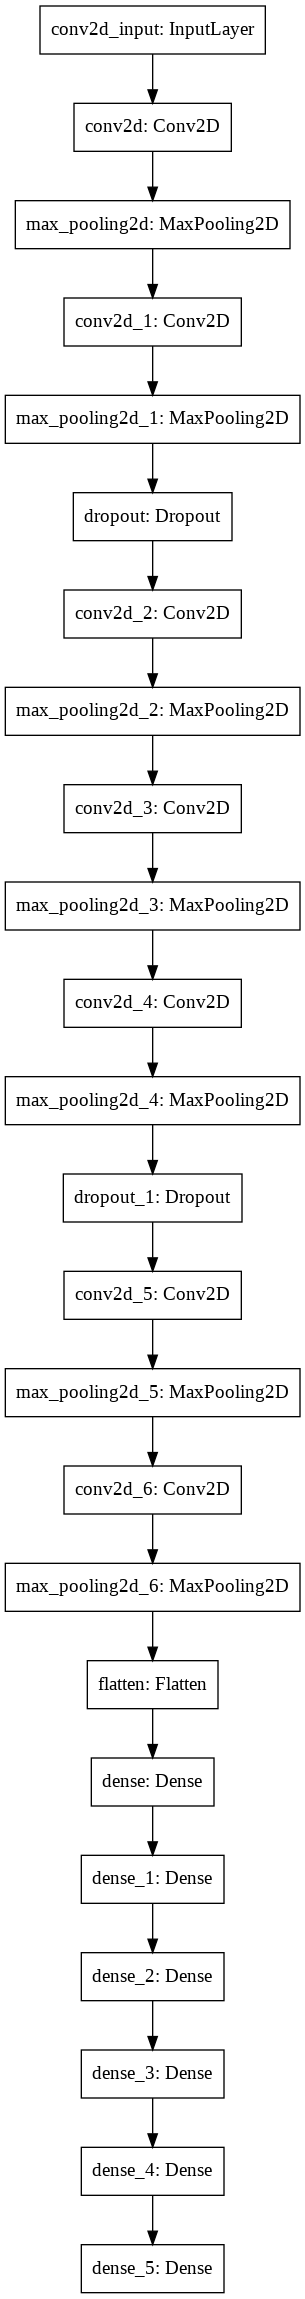

In [50]:
tf.keras.utils.plot_model(model1, to_file='model1.png')

#### Compilación del modelo No. 1

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fase de entrenamientos del modelo No. 1

In [0]:
xtrain_vec[0].shape

(67380, 32, 32, 1)

In [35]:
hist_vec1 = []
for i in tqdm(range(8)):
    hist_vec1.append(model1.fit(xtrain_vec[i], ytrain_vec[i], epochs=10, validation_data=(xtest_vec[i], ytest_vec[i])))

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 1.3591 - accuracy: 0.5710 - val_loss: 1.0929 - val_accuracy: 0.6475
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 1.1856 - accuracy: 0.6199 - val_loss: 0.9432 - val_accuracy: 0.7016
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 1.0613 - accuracy: 0.6550 - val_loss: 0.8713 - val_accuracy: 0.7133
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.9763 - accuracy: 0.6806 - val_loss: 0.8352 - val_accuracy: 0.7258
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.9090 - accuracy: 0.6973 - val_loss: 0.8002 - val_accuracy: 0.7409
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.8555 - accuracy: 0.7146 - val_loss: 0.7462 - val_accuracy: 0.7533
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.8145 - accuracy: 0.7288 - val_loss: 0.7445 -

 12%|█▎        | 1/8 [05:03<35:24, 303.53s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.8027 - accuracy: 0.7373 - val_loss: 0.6771 - val_accuracy: 0.7735
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.7488 - accuracy: 0.7527 - val_loss: 0.6800 - val_accuracy: 0.7750
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.7150 - accuracy: 0.7601 - val_loss: 0.6341 - val_accuracy: 0.7875
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6806 - accuracy: 0.7688 - val_loss: 0.6337 - val_accuracy: 0.7900
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6583 - accuracy: 0.7778 - val_loss: 0.6225 - val_accuracy: 0.7868
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6328 - accuracy: 0.7851 - val_loss: 0.6105 - val_accuracy: 0.7921
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6112 - accuracy: 0.7905 - val_loss: 0.6086 -

 25%|██▌       | 2/8 [10:06<30:19, 303.30s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6860 - accuracy: 0.7729 - val_loss: 0.5751 - val_accuracy: 0.8047
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6407 - accuracy: 0.7852 - val_loss: 0.5867 - val_accuracy: 0.8012
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6148 - accuracy: 0.7928 - val_loss: 0.5610 - val_accuracy: 0.8088
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5890 - accuracy: 0.7996 - val_loss: 0.5769 - val_accuracy: 0.8049
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5684 - accuracy: 0.8058 - val_loss: 0.5801 - val_accuracy: 0.8034
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5486 - accuracy: 0.8096 - val_loss: 0.5479 - val_accuracy: 0.8138
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5330 - accuracy: 0.8147 - val_loss: 0.5638 -

 38%|███▊      | 3/8 [15:07<25:13, 302.61s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.6278 - accuracy: 0.7932 - val_loss: 0.5281 - val_accuracy: 0.8206
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5934 - accuracy: 0.8005 - val_loss: 0.5336 - val_accuracy: 0.8205
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5631 - accuracy: 0.8083 - val_loss: 0.5279 - val_accuracy: 0.8208
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5430 - accuracy: 0.8130 - val_loss: 0.5263 - val_accuracy: 0.8200
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5212 - accuracy: 0.8188 - val_loss: 0.5175 - val_accuracy: 0.8251
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5122 - accuracy: 0.8221 - val_loss: 0.5323 - val_accuracy: 0.8180
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4935 - accuracy: 0.8283 - val_loss: 0.5240 -

 50%|█████     | 4/8 [20:08<20:08, 302.05s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5925 - accuracy: 0.8008 - val_loss: 0.5214 - val_accuracy: 0.8220
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5520 - accuracy: 0.8121 - val_loss: 0.5147 - val_accuracy: 0.8246
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5278 - accuracy: 0.8181 - val_loss: 0.5126 - val_accuracy: 0.8232
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5072 - accuracy: 0.8239 - val_loss: 0.5200 - val_accuracy: 0.8224
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4914 - accuracy: 0.8288 - val_loss: 0.5102 - val_accuracy: 0.8257
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4767 - accuracy: 0.8331 - val_loss: 0.5211 - val_accuracy: 0.8204
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4565 - accuracy: 0.8380 - val_loss: 0.5188 -

 62%|██████▎   | 5/8 [25:09<15:05, 301.92s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5729 - accuracy: 0.8100 - val_loss: 0.4969 - val_accuracy: 0.8279
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5369 - accuracy: 0.8184 - val_loss: 0.4922 - val_accuracy: 0.8281
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5095 - accuracy: 0.8255 - val_loss: 0.4971 - val_accuracy: 0.8291
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4901 - accuracy: 0.8306 - val_loss: 0.4883 - val_accuracy: 0.8287
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4730 - accuracy: 0.8346 - val_loss: 0.4929 - val_accuracy: 0.8311
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4598 - accuracy: 0.8384 - val_loss: 0.4958 - val_accuracy: 0.8328
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4442 - accuracy: 0.8430 - val_loss: 0.5091 -

 75%|███████▌  | 6/8 [30:11<10:03, 301.83s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5551 - accuracy: 0.8147 - val_loss: 0.4870 - val_accuracy: 0.8322
Epoch 2/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5143 - accuracy: 0.8246 - val_loss: 0.4927 - val_accuracy: 0.8300
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4898 - accuracy: 0.8298 - val_loss: 0.4947 - val_accuracy: 0.8284
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4705 - accuracy: 0.8364 - val_loss: 0.4867 - val_accuracy: 0.8299
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4552 - accuracy: 0.8403 - val_loss: 0.4867 - val_accuracy: 0.8316
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4393 - accuracy: 0.8433 - val_loss: 0.4945 - val_accuracy: 0.8318
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4290 - accuracy: 0.8491 - val_loss: 0.4840 -

 88%|████████▊ | 7/8 [35:12<05:01, 301.79s/it]

Epoch 1/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.5439 - accuracy: 0.8171 - val_loss: 0.4879 - val_accuracy: 0.8346
Epoch 2/10
2106/2106 [==============================] - 31s 15ms/step - loss: 0.5013 - accuracy: 0.8285 - val_loss: 0.4682 - val_accuracy: 0.8360
Epoch 3/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4781 - accuracy: 0.8334 - val_loss: 0.4704 - val_accuracy: 0.8345
Epoch 4/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4587 - accuracy: 0.8388 - val_loss: 0.4706 - val_accuracy: 0.8360
Epoch 5/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4464 - accuracy: 0.8433 - val_loss: 0.4703 - val_accuracy: 0.8392
Epoch 6/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4307 - accuracy: 0.8475 - val_loss: 0.4730 - val_accuracy: 0.8352
Epoch 7/10
2106/2106 [==============================] - 30s 14ms/step - loss: 0.4188 - accuracy: 0.8505 - val_loss: 0.4699 -

100%|██████████| 8/8 [40:15<00:00, 301.92s/it]


#### Muestra de resultados para el modelo No. 1: ultima fase de entrenamientos

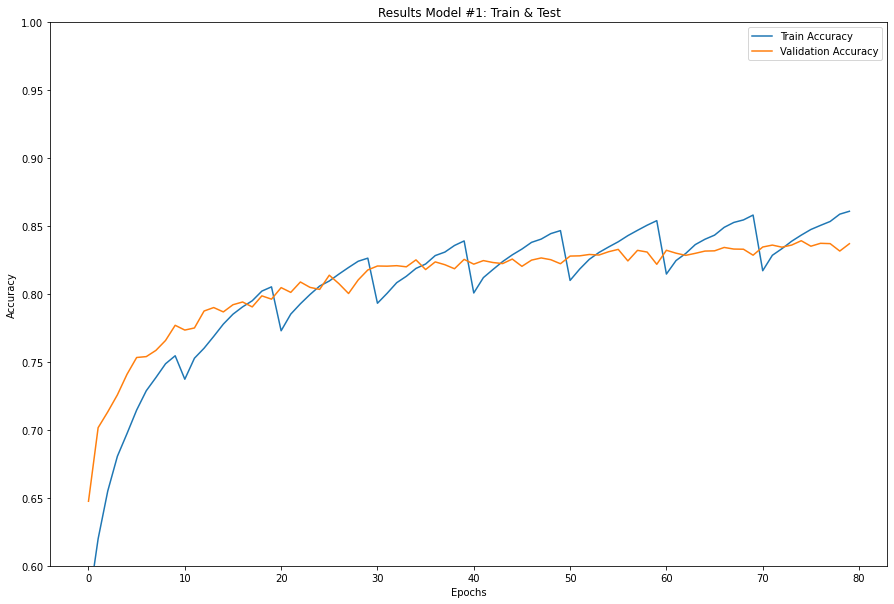

In [36]:
plt.figure(figsize=(15, 10))
hist_acc_tr = []
hist_acc_te = []
for i in range(8):
    hist_acc_tr += hist_vec1[i].history['accuracy']
    hist_acc_te += hist_vec1[i].history['val_accuracy']
plt.subplot(111)
plt.plot(hist_acc_tr, label='Train Accuracy')
plt.plot(hist_acc_te, label='Validation Accuracy')
plt.title('Results Model #1: Train & Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.6, 1))
plt.legend()
plt.show()

#### Cambiar el tamaño de las imagenes para el modelo no. 2

#### Modelo No. 2

In [0]:
# Capas Iniciales
inputs  = tf.keras.Input(shape=(32, 32, 1))
pr1  = tf.keras.layers.Conv2D(80, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(inputs)
pr1  = tf.keras.layers.BatchNormalization()(pr1)
pr1  = tf.keras.layers.Dropout(0.1)(pr1)
pr1  = tf.keras.layers.Activation('relu')(pr1)
pr1  = tf.keras.layers.Conv2D(60, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(pr1)
pr1  = tf.keras.layers.BatchNormalization()(pr1)
pr1  = tf.keras.layers.Dropout(0.1)(pr1)
pr1  = tf.keras.layers.Activation('relu')(pr1)
pr1  = tf.keras.layers.Conv2D(40, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(pr1)
pr1  = tf.keras.layers.BatchNormalization()(pr1)
pr1  = tf.keras.layers.Dropout(0.1)(pr1)
pr1  = tf.keras.layers.Activation('relu')(pr1)
pr1  = tf.keras.layers.MaxPooling2D((1, 1), padding='same')(pr1)
#Bloque 1
b1_a = tf.keras.layers.Conv2D(80, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(pr1)
b1_a = tf.keras.layers.BatchNormalization()(b1_a)
b1_a = tf.keras.layers.Dropout(0.1)(b1_a)
b1_a = tf.keras.layers.Activation('relu')(b1_a)
b1_a = tf.keras.layers.Conv2D(60, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b1_a)
b1_a = tf.keras.layers.BatchNormalization()(b1_a)
b1_a = tf.keras.layers.Dropout(0.1)(b1_a)
b1_a = tf.keras.layers.Activation('relu')(b1_a)
b1_a = tf.keras.layers.Conv2D(40, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b1_a)
b1_a = tf.keras.layers.BatchNormalization()(b1_a)
b1_a = tf.keras.layers.Dropout(0.1)(b1_a)
###
b1_b = tf.keras.layers.Conv2D(40, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(pr1)
b1_b = tf.keras.layers.BatchNormalization()(b1_b)
b1_b = tf.keras.layers.Dropout(0.1)(b1_b)
###
b1   = tf.keras.layers.Add()([b1_a, b1_b])
b1   = tf.keras.layers.Activation('relu')(b1)
b1   = tf.keras.layers.MaxPooling2D((1, 1), padding='same')(b1)
#Bloque 2
b2   = tf.keras.layers.Conv2D(80, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b1)
b2   = tf.keras.layers.BatchNormalization()(b2)
b2   = tf.keras.layers.Dropout(0.1)(b2)
b2   = tf.keras.layers.Activation('relu')(b2)
b2   = tf.keras.layers.Conv2D(60, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b2)
b2   = tf.keras.layers.BatchNormalization()(b2)
b2   = tf.keras.layers.Dropout(0.1)(b2)
b2   = tf.keras.layers.Activation('relu')(b2)
b2   = tf.keras.layers.Conv2D(40, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b2)
b2   = tf.keras.layers.BatchNormalization()(b2)
b2   = tf.keras.layers.Dropout(0.1)(b2)
b2   = tf.keras.layers.Add()([b2, b1])
b2   = tf.keras.layers.Activation('relu')(b2)
b2   = tf.keras.layers.MaxPooling2D((1, 1), padding='same')(b2)
#Bloque3
b3   = tf.keras.layers.Conv2D(80, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b2)
b3   = tf.keras.layers.BatchNormalization()(b3)
b3   = tf.keras.layers.Dropout(0.1)(b3)
b3   = tf.keras.layers.Activation('relu')(b3)
b3   = tf.keras.layers.Conv2D(60, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b3)
b3   = tf.keras.layers.BatchNormalization()(b3)
b3   = tf.keras.layers.Dropout(0.1)(b3)
b3   = tf.keras.layers.Activation('relu')(b3)
b3   = tf.keras.layers.Conv2D(40, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b3)
b3   = tf.keras.layers.BatchNormalization()(b3)
b3   = tf.keras.layers.Dropout(0.1)(b3)
b3   = tf.keras.layers.Add()([b3, b2])
b3   = tf.keras.layers.Activation('relu')(b3)
b3   = tf.keras.layers.MaxPooling2D((1, 1), padding='same')(b3)
#Bloque4
b4_a = tf.keras.layers.Conv2D(80, (9, 9), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b3)
b4_a = tf.keras.layers.BatchNormalization()(b4_a)
b4_a = tf.keras.layers.Dropout(0.1)(b4_a)
b4_a = tf.keras.layers.Activation('relu')(b4_a)
b4_a = tf.keras.layers.Conv2D(60, (9, 9), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b4_a)
b4_a = tf.keras.layers.BatchNormalization()(b4_a)
b4_a = tf.keras.layers.Dropout(0.1)(b4_a)
b4_a = tf.keras.layers.Activation('relu')(b4_a)
b4_a = tf.keras.layers.Conv2D(40, (9, 9), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b4_a)
b4_a = tf.keras.layers.BatchNormalization()(b4_a)
b4_a = tf.keras.layers.Dropout(0.1)(b4_a)
###
b4_b = tf.keras.layers.Conv2D(40, (9, 9), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1))(b3)
b4_b = tf.keras.layers.BatchNormalization()(b4_b)
b4_b = tf.keras.layers.Dropout(0.1)(b4_b)
###
b4   = tf.keras.layers.Add()([b4_a, b4_b])
b4   = tf.keras.layers.Activation('relu')(b4)
b4   = tf.keras.layers.MaxPooling2D((1, 1), padding='same')(b4)
#Bloque Denso
de   = tf.keras.layers.Flatten()(b4)
de   = tf.keras.layers.Dense(4096, activation='relu', kernel_initializer='he_uniform')(de)
de   = tf.keras.layers.Dense(2048, activation='relu', kernel_initializer='he_uniform')(de)
de   = tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform')(de)
de   = tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform')(de)
de   = tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform')(de)
de   = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(de)
de   = tf.keras.layers.Dense(62, activation='softmax')(de)
outputs = de
#Definicion del modelo
model2 = tf.keras.models.Model(inputs, outputs)

#### Visualización del modelo y sus características

In [43]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 32, 32, 80)   800         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 32, 32, 80)   320         conv2d_41[0][0]                  
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 32, 32, 80)   0           batch_normalization_34[0][0]     
____________________________________________________________________________________________

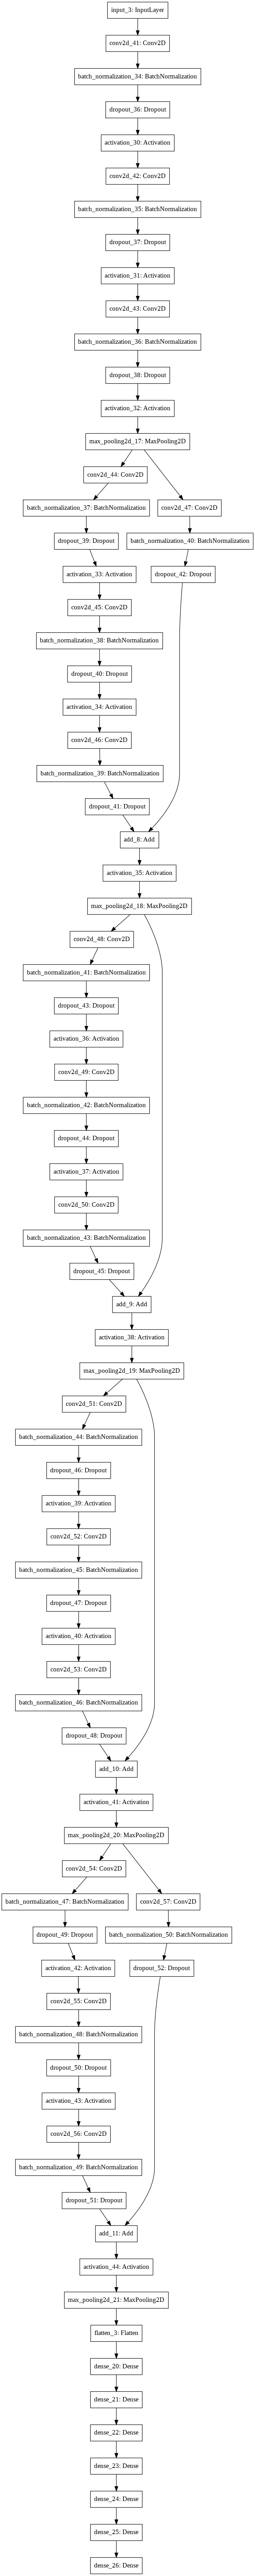

In [49]:
tf.keras.utils.plot_model(model2, to_file='model2.png')

#### Compilación del modelo 2_1

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
hist_vec2 = []
for i in tqdm(range(8)):
    hist_vec2.append(model2.fit(xtrain_vec[i], ytrain_vec[i], epochs=3, validation_data=(xtest_vec[i], ytest_vec[i])))


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/3
2106/2106 [==============================] - 568s 270ms/step - loss: 1.6381 - accuracy: 0.5530 - val_loss: 0.8905 - val_accuracy: 0.7320
Epoch 2/3
2106/2106 [==============================] - 567s 269ms/step - loss: 0.6909 - accuracy: 0.7736 - val_loss: 0.6753 - val_accuracy: 0.7741
Epoch 3/3
2106/2106 [==============================] - 566s 269ms/step - loss: 0.5626 - accuracy: 0.8069 - val_loss: 0.5860 - val_accuracy: 0.7995



 12%|█▎        | 1/8 [28:25<3:18:55, 1705.08s/it]

Epoch 1/3
2106/2106 [==============================] - 566s 269ms/step - loss: 0.5827 - accuracy: 0.8056 - val_loss: 0.5621 - val_accuracy: 0.8138
Epoch 2/3
2106/2106 [==============================] - 566s 269ms/step - loss: 0.4847 - accuracy: 0.8297 - val_loss: 0.5477 - val_accuracy: 0.8192
Epoch 3/3
2106/2106 [==============================] - 566s 269ms/step - loss: 0.4139 - accuracy: 0.8488 - val_loss: 0.5707 - val_accuracy: 0.8196



 25%|██▌       | 2/8 [56:43<2:50:18, 1703.16s/it]

Epoch 1/3
2106/2106 [==============================] - 566s 269ms/step - loss: 0.5194 - accuracy: 0.8253 - val_loss: 0.4933 - val_accuracy: 0.8327
Epoch 2/3
2106/2106 [==============================] - 568s 270ms/step - loss: 0.4150 - accuracy: 0.8509 - val_loss: 0.4887 - val_accuracy: 0.8408
Epoch 3/3
2106/2106 [==============================] - 570s 271ms/step - loss: 0.3585 - accuracy: 0.8670 - val_loss: 0.4907 - val_accuracy: 0.8401



 38%|███▊      | 3/8 [1:25:08<2:21:58, 1703.60s/it]

Epoch 1/3
2106/2106 [==============================] - 568s 270ms/step - loss: 0.4980 - accuracy: 0.8327 - val_loss: 0.4550 - val_accuracy: 0.8464
Epoch 2/3
2106/2106 [==============================] - 569s 270ms/step - loss: 0.3879 - accuracy: 0.8589 - val_loss: 0.4619 - val_accuracy: 0.8458
Epoch 3/3
2106/2106 [==============================] - 562s 267ms/step - loss: 0.3314 - accuracy: 0.8768 - val_loss: 0.4959 - val_accuracy: 0.8423



 50%|█████     | 4/8 [1:53:28<1:53:30, 1702.51s/it]

Epoch 1/3
2106/2106 [==============================] - 562s 267ms/step - loss: 0.4688 - accuracy: 0.8402 - val_loss: 0.4482 - val_accuracy: 0.8476
Epoch 2/3
2106/2106 [==============================] - 561s 267ms/step - loss: 0.3580 - accuracy: 0.8692 - val_loss: 0.4827 - val_accuracy: 0.8455
Epoch 3/3
2106/2106 [==============================] - 561s 266ms/step - loss: 0.3014 - accuracy: 0.8858 - val_loss: 0.4936 - val_accuracy: 0.8427



 62%|██████▎   | 5/8 [2:21:33<1:24:52, 1697.35s/it]

Epoch 1/3
2106/2106 [==============================] - 561s 266ms/step - loss: 0.4624 - accuracy: 0.8424 - val_loss: 0.4392 - val_accuracy: 0.8492
Epoch 2/3
2106/2106 [==============================] - 561s 266ms/step - loss: 0.3447 - accuracy: 0.8717 - val_loss: 0.4573 - val_accuracy: 0.8478
Epoch 3/3
2106/2106 [==============================] - 564s 268ms/step - loss: 0.2849 - accuracy: 0.8917 - val_loss: 0.4746 - val_accuracy: 0.8496



 75%|███████▌  | 6/8 [2:49:39<56:27, 1693.99s/it]  

Epoch 1/3
2106/2106 [==============================] - 565s 268ms/step - loss: 0.4463 - accuracy: 0.8470 - val_loss: 0.4226 - val_accuracy: 0.8559
Epoch 2/3
2106/2106 [==============================] - 565s 268ms/step - loss: 0.3258 - accuracy: 0.8792 - val_loss: 0.4427 - val_accuracy: 0.8534
Epoch 3/3
2106/2106 [==============================] - 565s 268ms/step - loss: 0.2668 - accuracy: 0.8978 - val_loss: 0.4699 - val_accuracy: 0.8527



 88%|████████▊ | 7/8 [3:17:55<28:14, 1694.54s/it]

Epoch 1/3
2106/2106 [==============================] - 568s 270ms/step - loss: 0.4451 - accuracy: 0.8478 - val_loss: 0.4184 - val_accuracy: 0.8542
Epoch 2/3
2106/2106 [==============================] - 566s 269ms/step - loss: 0.3223 - accuracy: 0.8792 - val_loss: 0.4274 - val_accuracy: 0.8586
Epoch 3/3
2106/2106 [==============================] - 567s 269ms/step - loss: 0.2648 - accuracy: 0.8993 - val_loss: 0.4425 - val_accuracy: 0.8567



100%|██████████| 8/8 [3:46:17<00:00, 1697.17s/it]


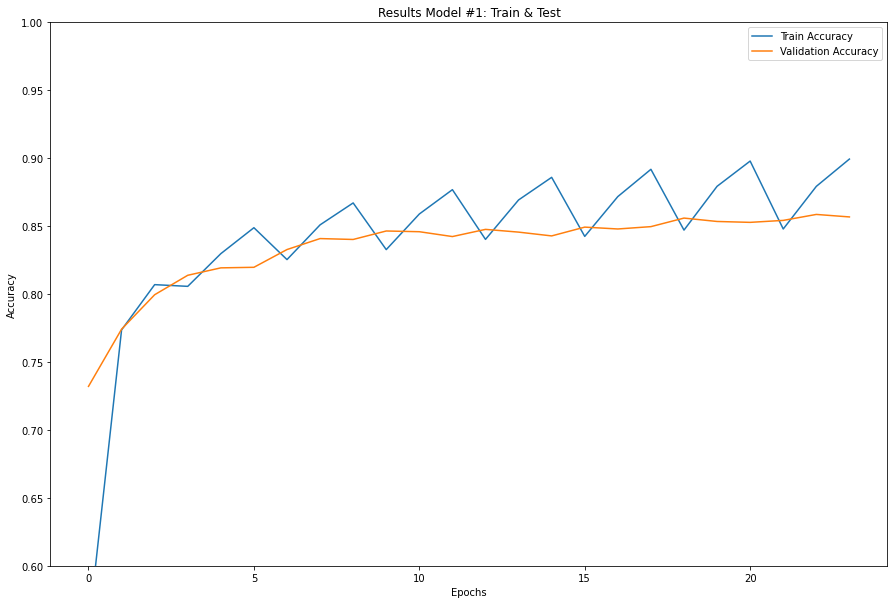

In [47]:
plt.figure(figsize=(15, 10))
hist_acc_tr = []
hist_acc_te = []
for i in range(8):
    hist_acc_tr += hist_vec2[i].history['accuracy']
    hist_acc_te += hist_vec2[i].history['val_accuracy']
plt.subplot(111)
plt.plot(hist_acc_tr, label='Train Accuracy')
plt.plot(hist_acc_te, label='Validation Accuracy')
plt.title('Results Model #1: Train & Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.6, 1))
plt.legend()
plt.show()

In [0]:
model1.save_weights('./model1_weights')
model2.save_weights('./model2_weights')
#model.load_weights('file', by_name=False)

# Algoritmos de Segmentación

#### Segmentación rigida

In [0]:
def rigid_seg(img1):
    chr_img       = np.copy(img1).astype(np.uint8)
    cnts, _       = cv.findContours(chr_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    boxes         = [cv.boundingRect(c) for c in cnts]
    (cnts, boxes) = zip(*sorted(zip(cnts, boxes), key=lambda b: b[1][0]))

    chr_vec = []
    for i in range(len(boxes)):
        cnt = cnts[i]
        box = boxes[i]
        if cv.contourArea(cnt) > 59:
            (x,y,w,h) = box
            chr_vec.append(chr_img[y:y+h, x:x+w])

    plt.figure(figsize=(10, 5))
    lch = len(chr_vec)
    for i in range(lch):
        plt.subplot(1, lch, i+1)
        plt.imshow(chr_vec[i])
    plt.show()
    return chr_vec

#### Segmentación por cultivo de bacterias

In [0]:
class agent():
    def __init__(self, img, x, y):
        self.img = img
        self.x   = x
        self.y   = y

    def testf(self):
        if self.img[self.x, self.y] == 1.0:
            return 1
        else:
            return 0

    def set_pos(self, nx, ny):
        self.x = nx
        self.y = ny
        return self

    def get_pos(self):
        return [self.x, self.y]

class bfo():
    """
    Bacteria Foraging Optimization for Image Segmentation
    Optimización de búsqueda de bacterias para la segmentación de imágenes
    """
    def __init__(self, img, n, lb, ub, iter):
        """
        :param n: number of agents
        :param lb: lower limits for plot axes
        :param ub: upper limits for plot axes
        :param iter: the number of iterations
        :param name: The word to be segmented from the image
        """
        self.img  = img
        # Generate points for deploying the agents
        points = np.random.randint(lb, ub, (n, 2)).tolist()

        # Generate agents
        self.agents = [agent(img, point[0], point[1]) for point in points]

        # Image Sizes
        (s1, s2) = img.shape

        # Optimization process
        for t in tqdm(range(iter)):
            for i in tqdm(range(n)):
                while self.agents[i].testf() == 0:
                    dell = np.random.randint(-1, 2, 2)
                    pos_i = np.array(self.agents[i].get_pos())
                    pos_i += dell
                    bol1  = pos_i[0] >= 0 and pos_i[1] >= 0
                    bol2  = pos_i[0] < s1 and pos_i[1] < s2
                    if bol1 and bol2:
                        self.agents[i] = self.agents[i].set_pos(pos_i[0], pos_i[1])

    def plot_agents(self):
        plt.figure(figsize=(10, 10))
        sa = len(self.agents)
        x = np.zeros(sa)
        y = np.zeros(sa)
        for i in tqdm(range(sa)):
            [x[i], y[i]] = self.agents[i].get_pos()

        plt.scatter(y, max(x) - x, c='b', marker='.', alpha=0.5)
        plt.title('BFOA')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def cluster_agents(self, thr):
        img       = np.copy(self.img)
        (sx, sy)  = img.shape
        sa        = len(self.agents)
        vecsum    = np.zeros(sy)
        for j in tqdm(range(sy)):
            for i in range(sx):
                for k in range(sa):
                    [px, py] = self.agents[k].get_pos()
                    if px == i and py == j:
                        vecsum[j] += 1
        y_x       = np.array(range(sy))
        # Ver distribucion de agentes en la imagen: HISTOGRAMA
        #plt.subplot(111)
        #plt.bar(y_x, vecsum)
        #plt.show()
        # Guardar indices donde el valor de vecsum < thr
        vecidx = []
        for i in range(sy):
            if vecsum[i] < thr:
                vecidx.append(i)
        # Recortar Imagen en trozos
        pieces = []
        for i in range(1, len(vecidx)):
            idx1 = vecidx[i-1]
            idx2 = vecidx[i]
            pie0 = img[:, idx1:idx2+1]
            if pie0.shape[1] > 2:
                pieces.append(pie0)
        return pieces

In [0]:
# Lectura del dataset para segmentación y clasificación
data_iam = loadmat('iam.mat')
iamx     = data_iam['x']
iamy     = data_iam['y']

In [0]:
# Seleccionar palabras para probar la segmentación
siamx    = iamx.shape[0]
imx_r    = iamx[0:10]
imy_r    = iamy[0:10]
sidx     = imx_r.shape[0]

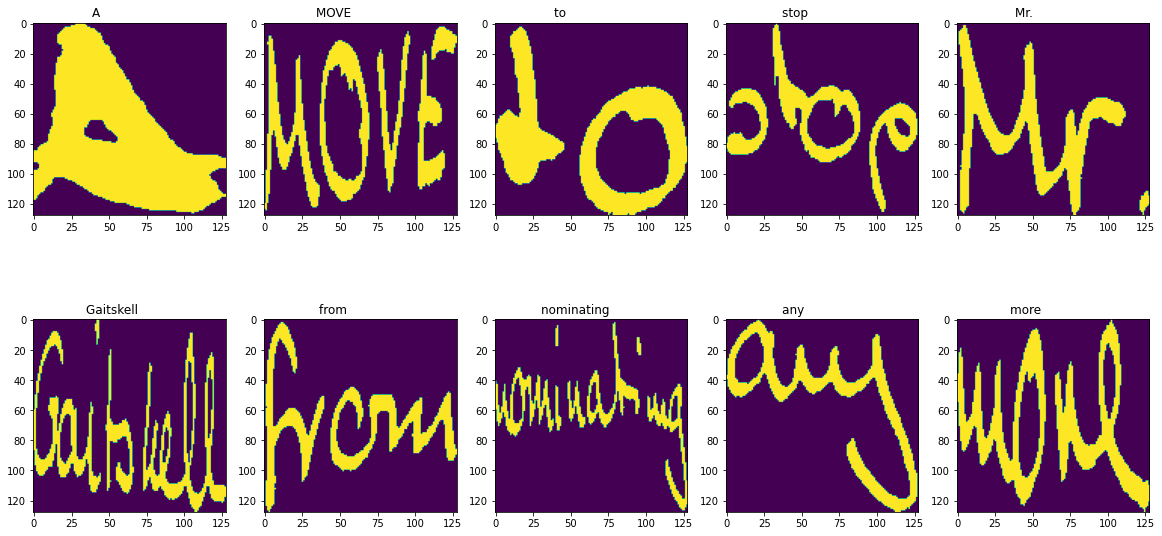

In [82]:
plt.figure(figsize=(20, 10))
for i in range(sidx):
    plt.subplot(2, 5, i+1)
    plt.imshow(imx_r[i])
    plt.title(imy_r[i])
plt.show()

# Proceso de segmentación y clasificación final

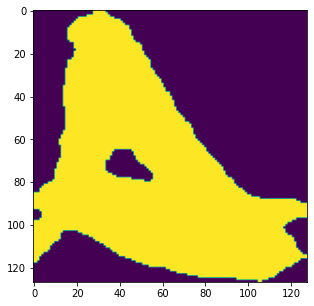

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 41%|████      | 6647/16384 [03:00<06:23, 25.36it/s]



 41%|████      | 6652/16384 [03:00<06:06, 26.53it/s]



 41%|████      | 6659/16384 [03:01<06:52, 23.57it/s]



 41%|████      | 6680/16384 [03:01<05:34, 28.99it/s]



 41%|████      | 6686/16384 [03:01<05:14, 30.83it/s]



 41%|████      | 6691/16384 [03:01<05:25, 29.77it/s]



 41%|████      | 6695/16384 [03:01<05:28, 29.45it/s]



 41%|████      | 6719/16384 [03:02<04:10, 38.61it/s]



 41%|████      | 6726/16384 [03:02<07:23, 21.76it/s]



 41%|████      | 6742/16384 [03:03<06:04, 26.43it/s]



 41%|████      | 6748/16384 [03:03<06:52, 23.34it/s]



 41%|████      | 6753/16384 [03:03<08:33, 18.76it/s]



 41%|████      | 6757/16384 [03:03<07:19, 21.91it/s]



 41%|████▏     | 6774/16384 [03:04<06:54, 23.16it/s]



 41%|████▏     | 6782/16384 [03:05<08:56, 17.89it/s]



 41%|████▏     | 6788/16384 [03:05<10:36, 15.06it/s]



 41%|████▏     | 6795/16384 [03:05<08

In [0]:
pred_mat = []
thr = 0.60
for i in range(sidx):
    pred_vec1 = []
    pred_vec2 = []
    # Imagen segmentada de forma rigida
    char_vec1 = rigid_seg(imx_r[i])

    for j in range(len(char_vec1)):
        char_vec1[j] = np.expand_dims(cv.resize(char_vec1[j], (32, 32), interpolation=cv.INTER_AREA), axis=0)
        pred1        = model2.predict(char_vec1[j])
        if np.max(pred1[0]) > thr:
            for k in dic:
                #for i in range                
                if dic[k] == pred1[0].astype(float).tolist().index(float(np.max(pred1))):
                    pred_vec1.append([k, j])        
    ###
    n  = imx_r[i].shape[0]*imx_r[i].shape[1]
    s1 = imx_r[i].shape[0]
    thr = 50
    # Imagen segmentada de forma flexible
    bfoa = bfo(imx_r[i], n, lb=0, ub=s1, iter=5)
    char_vec2 = bfoa.cluster_agents(thr)
    for j in range(len(char_vec2)):
        char_vec2[j] = np.expand_dims(cv.resize(char_vec2[j], (32, 32), interpolation=cv.INTER_AREA), axis=0)
        pred2        = model2.predict(char_vec1[j])
        if np.max(pred2) > thr:
            for k in dic:
                if dic[k] == pred2[0].astype(float).tolist().index(float(np.max(pred2))):
                    pred_vec2.append([k, j])
    pred_vec = pred_vec1+pred_vec2
    pred_vec = pred_vec.sort(key=lambda x: x[1])
    pred_mat.append([pred_vec, imy_r[i]])
    ###
    break
    #Proceso de prediccion con los modelos convolucionales
    

In [0]:
for i in pred_mat:
    print(i)